In [4]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv1D, Flatten, Dense, Dropout, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


data = pd.read_csv("dataset.csv",low_memory=False)

print(data.shape)

(4424, 35)


In [5]:
# Check if the target column exists
target_column = "Target"  # Replace with the actual target column name
if target_column in data.columns:
    print(f"The target column '{target_column}' exists in the dataset.")
else:
    print(f"The target column '{target_column}' does NOT exist in the dataset.")

The target column 'Target' exists in the dataset.


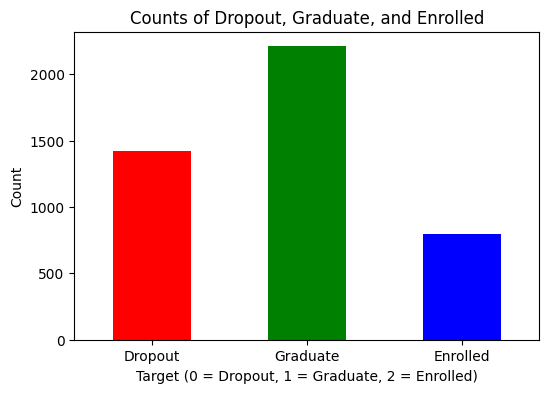

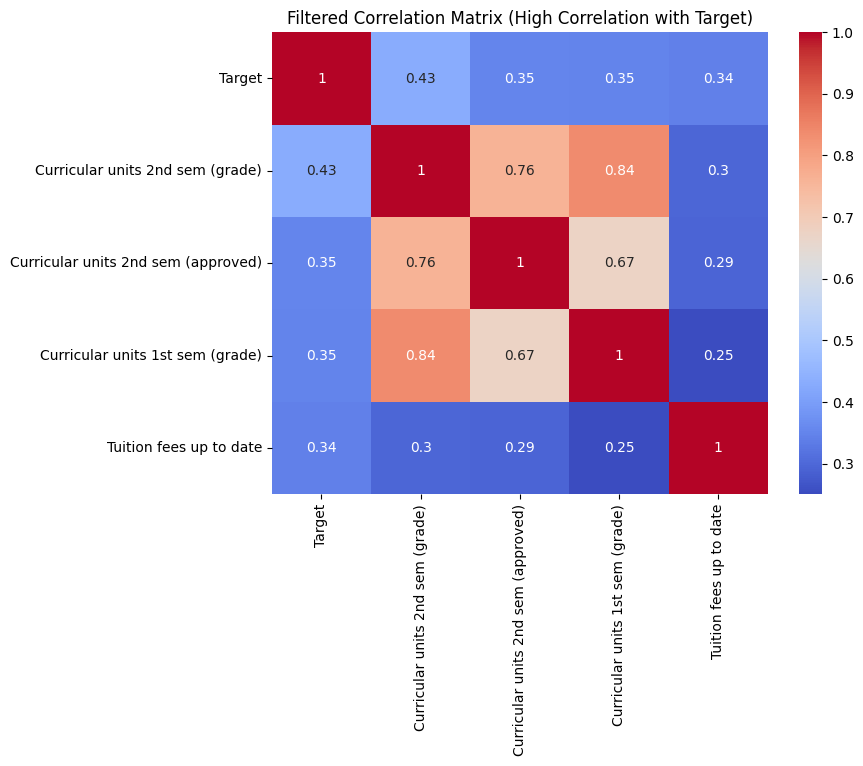

In [6]:

# Encode the Target column to numerical values
target_mapping = {'Dropout': 0, 'Graduate': 1, 'Enrolled': 2}
if 'Target' in data.columns:
    data['Target'] = data['Target'].map(target_mapping)
else:
    raise ValueError("The 'Target' column is missing from the dataset.")

# Add a bar graph for Dropout, Graduate, and Enrolled
if not data['Target'].isnull().all():
    plt.figure(figsize=(6, 4))
    data['Target'].value_counts().sort_index().plot(kind='bar', color=['red', 'green', 'blue'])
    plt.title('Counts of Dropout, Graduate, and Enrolled')
    plt.xlabel('Target (0 = Dropout, 1 = Graduate, 2 = Enrolled)')
    plt.ylabel('Count')
    plt.xticks(ticks=[0, 1, 2], labels=['Dropout', 'Graduate', 'Enrolled'], rotation=0)
    plt.show()
else:
    print("The Target column is empty or contains only NaN values.")

# Ensure numeric_data is defined by selecting only numeric columns from the dataset
numeric_data = data.select_dtypes(include=['number'])

# Calculate correlations with the Target column
if 'Target' in numeric_data.columns:
    correlations_with_target = numeric_data.corr()['Target'].sort_values(ascending=False)

    # Filter columns with high correlation (absolute value > 0.3 as an example threshold)
    high_correlation_columns = correlations_with_target[abs(correlations_with_target) > 0.3].index
    

    # Visualize the filtered correlation matrix
    if len(high_correlation_columns) > 1:  # Ensure there are enough columns to create a matrix
        plt.figure(figsize=(8, 6))
        filtered_correlation_matrix = numeric_data[high_correlation_columns].corr()
        sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm')
        plt.title('Filtered Correlation Matrix (High Correlation with Target)')
        plt.show()
    else:
        print("Not enough highly correlated columns to create a correlation matrix.")
else:
    print("The 'Target' column is missing from numeric_data.")

/var/folders/q0/djdb7_k941z5tq5b1xsd0xhc0000gn/T/ipykernel_3798/667784458.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_with_dropout[top_correlated_features], y=top_correlated_features, palette='viridis')


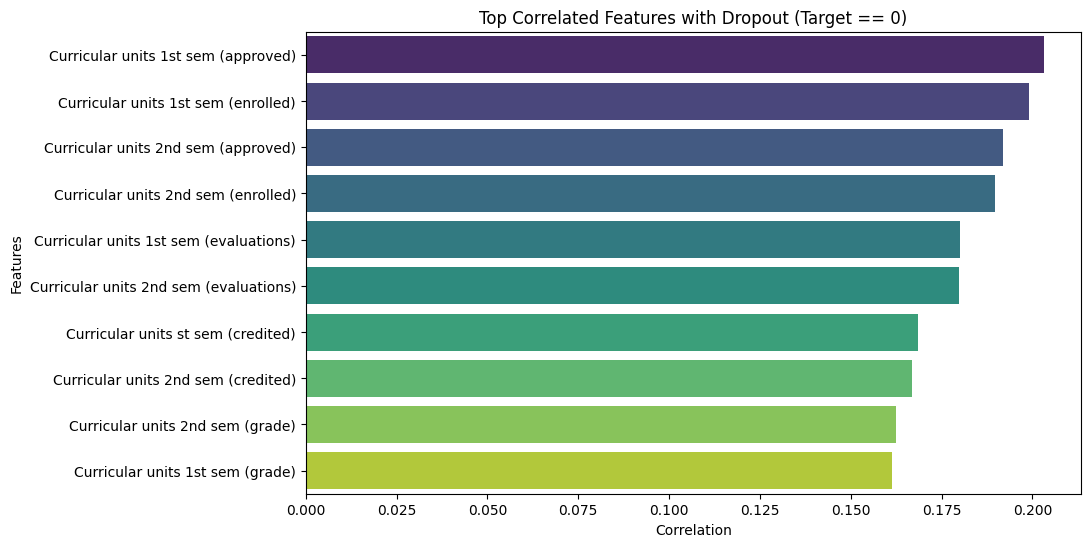


Boxplots for Top Correlated Features:


/var/folders/q0/djdb7_k941z5tq5b1xsd0xhc0000gn/T/ipykernel_3798/667784458.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


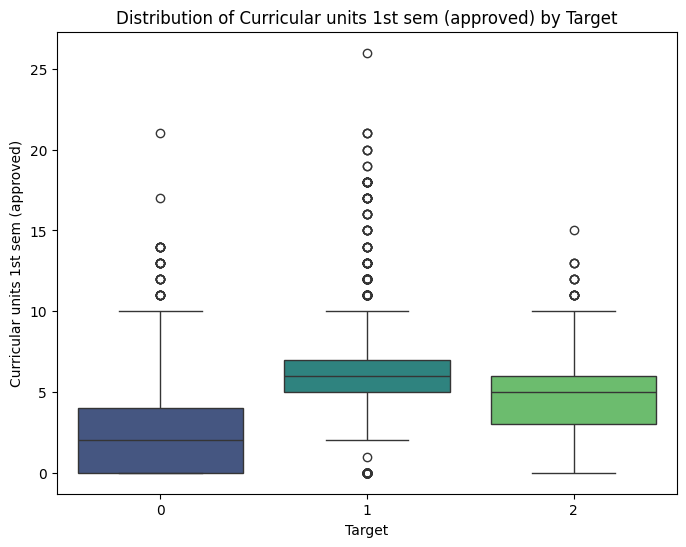

/var/folders/q0/djdb7_k941z5tq5b1xsd0xhc0000gn/T/ipykernel_3798/667784458.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


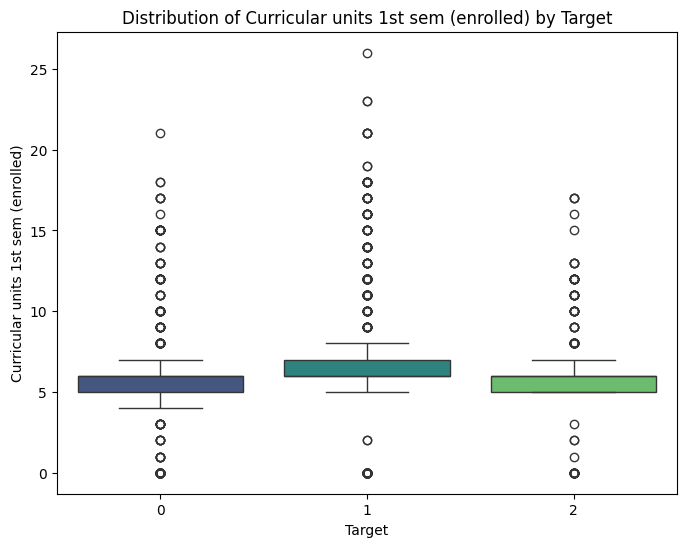

/var/folders/q0/djdb7_k941z5tq5b1xsd0xhc0000gn/T/ipykernel_3798/667784458.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


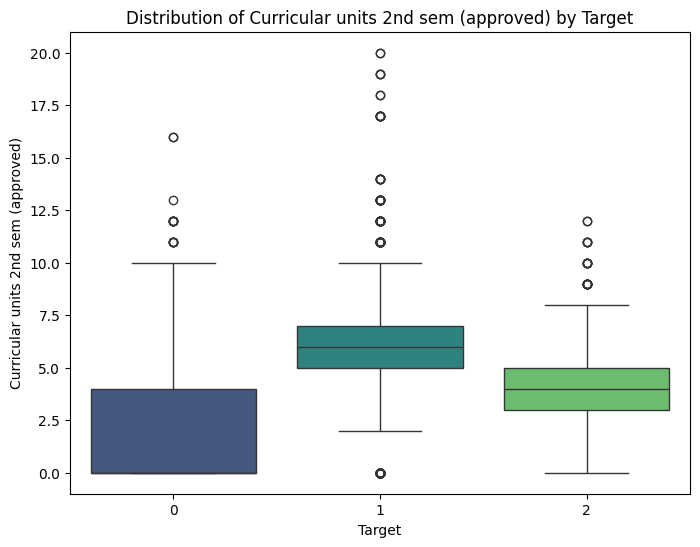

/var/folders/q0/djdb7_k941z5tq5b1xsd0xhc0000gn/T/ipykernel_3798/667784458.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


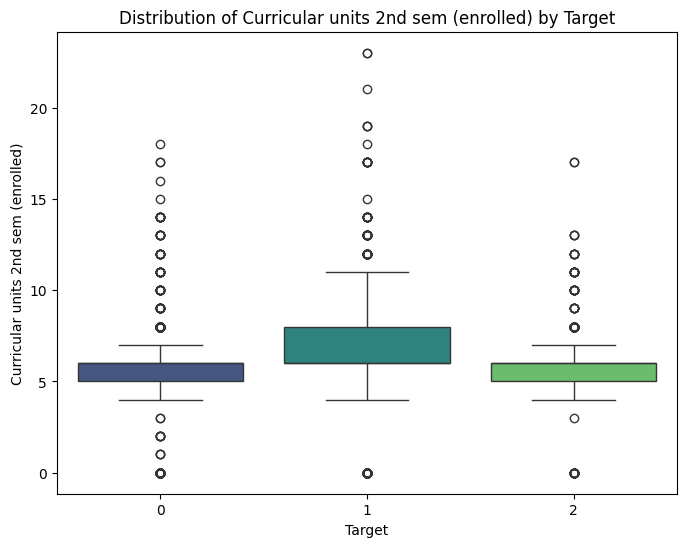

/var/folders/q0/djdb7_k941z5tq5b1xsd0xhc0000gn/T/ipykernel_3798/667784458.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


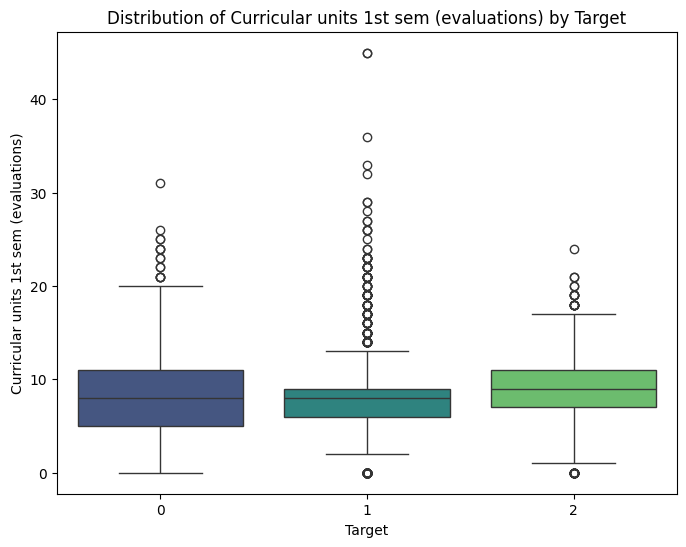

/var/folders/q0/djdb7_k941z5tq5b1xsd0xhc0000gn/T/ipykernel_3798/667784458.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


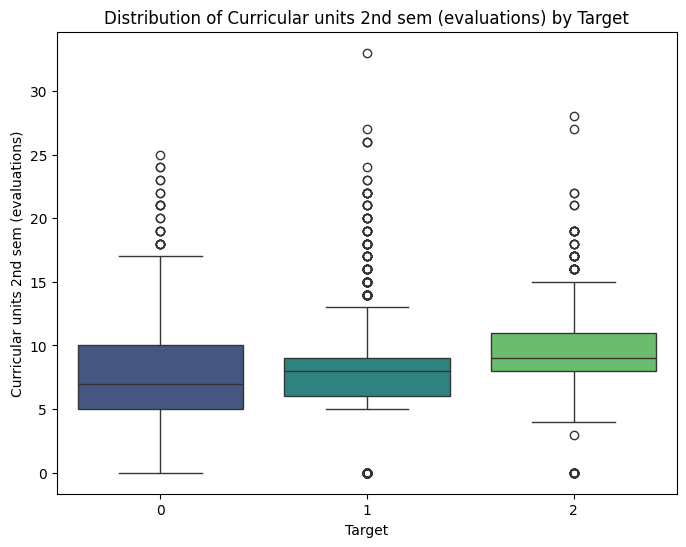

/var/folders/q0/djdb7_k941z5tq5b1xsd0xhc0000gn/T/ipykernel_3798/667784458.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


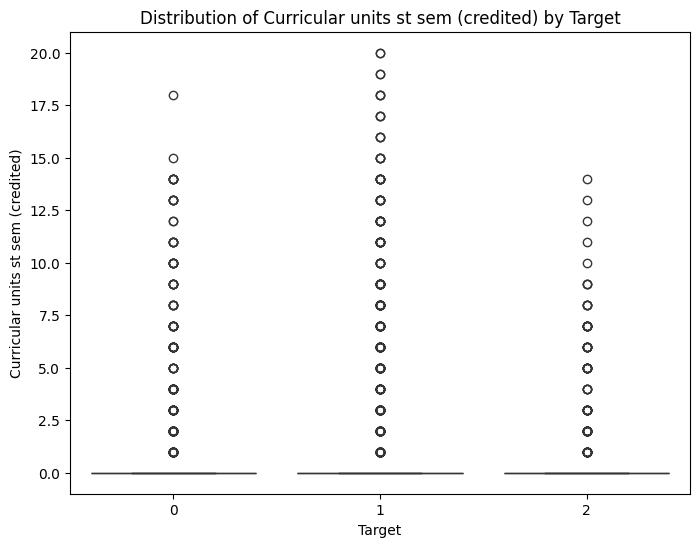

/var/folders/q0/djdb7_k941z5tq5b1xsd0xhc0000gn/T/ipykernel_3798/667784458.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


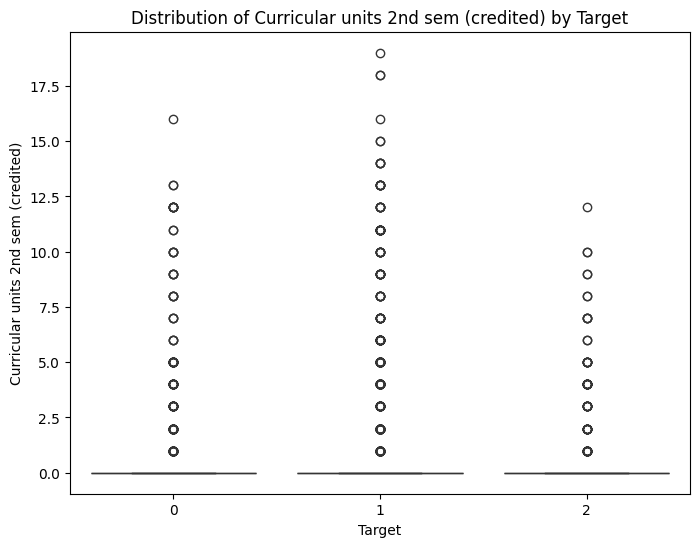

/var/folders/q0/djdb7_k941z5tq5b1xsd0xhc0000gn/T/ipykernel_3798/667784458.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


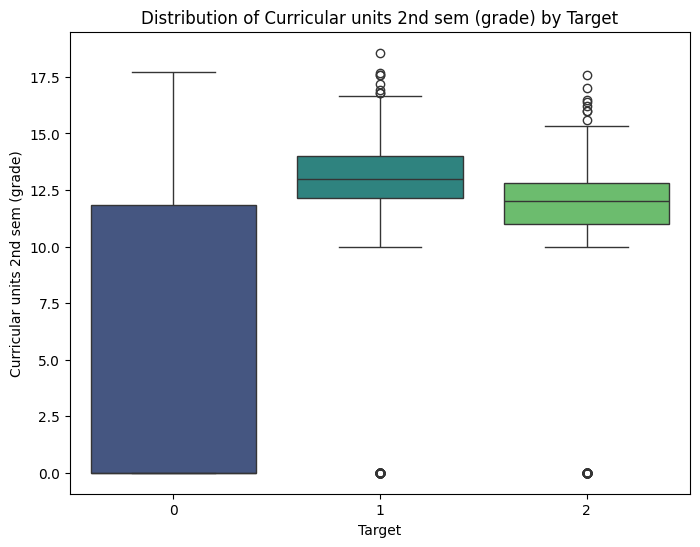

/var/folders/q0/djdb7_k941z5tq5b1xsd0xhc0000gn/T/ipykernel_3798/667784458.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


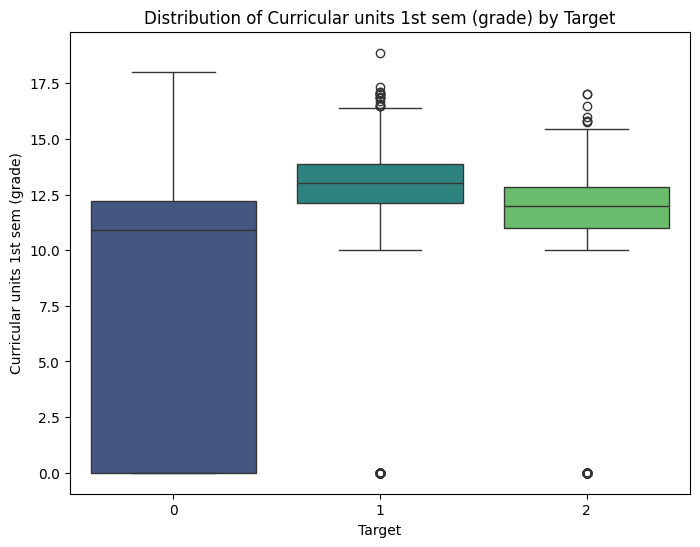

In [7]:

# Filter the dataset for Dropout (Target == 0)
dropout_data = data[data['Target'] == 0]

# Calculate correlations for Dropout subset
dropout_numeric_data = dropout_data.select_dtypes(include=['number'])  # Select only numeric columns
correlations_with_dropout = dropout_numeric_data.corr().mean().sort_values(ascending=False)

# Visualize the top correlated features with Dropout
top_correlated_features = correlations_with_dropout.head(10).index  # Top 10 correlated features
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations_with_dropout[top_correlated_features], y=top_correlated_features, palette='viridis')
plt.title('Top Correlated Features with Dropout (Target == 0)')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

# 1. Boxplots for Feature Distributions by Target
print("\nBoxplots for Top Correlated Features:")
for feature in top_correlated_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Target', y=feature, data=data, palette='viridis')
    plt.title(f'Distribution of {feature} by Target')
    plt.xlabel('Target')
    plt.ylabel(feature)
    plt.show()

# 2. Feature Importance Using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare data for Random Forest
X = data.drop(columns=['Target'])  # Features
y = data['Target']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)



Training CNN with fixed kernel size = 3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


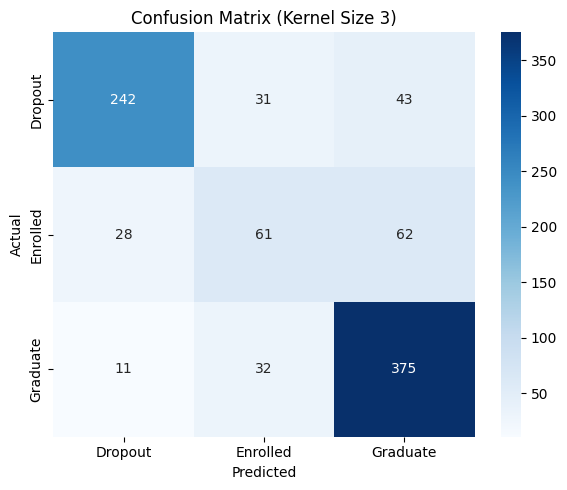


Training CNN with fixed kernel size = 5
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


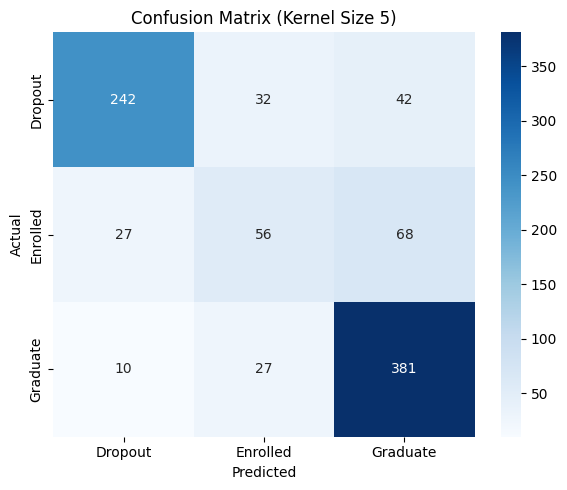


Training CNN with fixed kernel size = 7
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


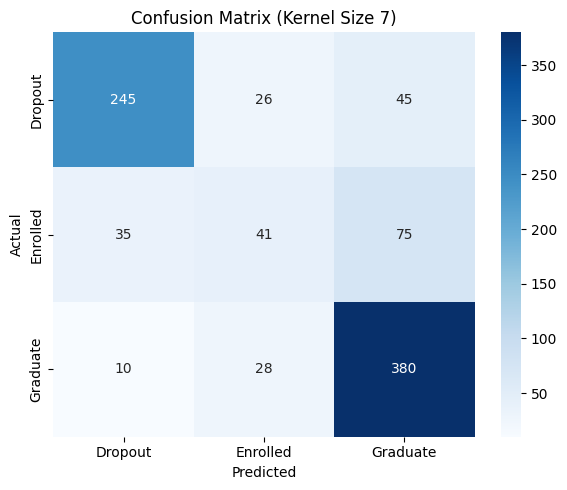


Training CNN with varying kernel sizes = [3, 5, 7]
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


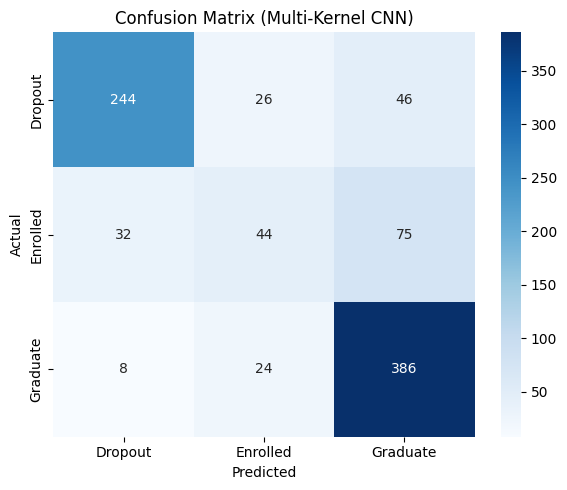


📊 Model Performance Summary:
Fixed Kernel 3:
  Accuracy:  0.7782
  Precision: 0.7604
  Recall:    0.7661
  F1-Score:  0.7596

Fixed Kernel 5:
  Accuracy:  0.7797
  Precision: 0.7593
  Recall:    0.7672
  F1-Score:  0.7582

Fixed Kernel 7:
  Accuracy:  0.7754
  Precision: 0.7343
  Recall:    0.7525
  F1-Score:  0.7366

Multi-Kernel [3,5,7]:
  Accuracy:  0.7797
  Precision: 0.7462
  Recall:    0.7616
  F1-Score:  0.7459



In [8]:
# --- 1. Load and preprocess the data ---
data = pd.read_csv("dataset.csv")

# Separate features and target
X = pd.get_dummies(data.drop(columns=['Target']), drop_first=True)
y = data['Target']

# Normalize features
X = StandardScaler().fit_transform(X)

# One-hot encode the target labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.values.reshape(-1, 1))

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a "channel" dimension for CNN (needed for Conv1D)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# --- 2. Early stopping to prevent overfitting ---
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# --- 3. Build a CNN with a fixed kernel size ---
def build_fixed_kernel_cnn(kernel_size):
    model = Sequential([
        Input(shape=(X_train.shape[1], 1)),  # ✅ fixes warning
        Conv1D(64, kernel_size, activation='relu'),
        Dropout(0.3),
        Conv1D(128, kernel_size, activation='relu'),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(y_train.shape[1], activation='softmax')
    ])
    model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# --- 4. Build a CNN with varying kernel sizes in parallel ---
def build_multi_kernel_cnn(kernel_sizes):
    input_layer = Input(shape=(X_train.shape[1], 1))
    branches = []

    for k in kernel_sizes:
        x = Conv1D(64, kernel_size=k, activation='relu', padding='same')(input_layer)
        x = Dropout(0.3)(x)
        x = Conv1D(128, kernel_size=k, activation='relu', padding='same')(x)
        x = Flatten()(x)
        branches.append(x)

    merged = Concatenate()(branches)
    x = Dense(256, activation='relu')(merged)
    x = Dropout(0.5)(x)
    output = Dense(y_train.shape[1], activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# --- 5. Train fixed-kernel models (one per kernel size) ---
results = {}
fixed_kernels = [3, 5, 7]

for k in fixed_kernels:
    print(f"\nTraining CNN with fixed kernel size = {k}")
    model = build_fixed_kernel_cnn(k)
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,
                        verbose=0, callbacks=[early_stopping])

    # Evaluate on test set
    y_pred = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test, axis=1)

    # Get classification metrics
    report = classification_report(y_true_labels, y_pred_labels, output_dict=True)
    cm = confusion_matrix(y_true_labels, y_pred_labels)

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f'Confusion Matrix (Kernel Size {k})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    results[f'Fixed Kernel {k}'] = {
        'accuracy': history.history['val_accuracy'][-1],
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1_score': report['weighted avg']['f1-score']
    }

# --- 6. Train one model with all kernel sizes at once (multi-kernel CNN) ---
print("\nTraining CNN with varying kernel sizes = [3, 5, 7]")
model = build_multi_kernel_cnn([3, 5, 7])
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,
                    verbose=0, callbacks=[early_stopping])

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

report = classification_report(y_true_labels, y_pred_labels, output_dict=True)
cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.title('Confusion Matrix (Multi-Kernel CNN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

results['Multi-Kernel [3,5,7]'] = {
    'accuracy': history.history['val_accuracy'][-1],
    'precision': report['weighted avg']['precision'],
    'recall': report['weighted avg']['recall'],
    'f1_score': report['weighted avg']['f1-score']
}

# --- 7. Final Summary ---
print("\n📊 Model Performance Summary:")
for name, metrics in results.items():
    print(f"{name}:\n  Accuracy:  {metrics['accuracy']:.4f}"
          f"\n  Precision: {metrics['precision']:.4f}"
          f"\n  Recall:    {metrics['recall']:.4f}"
          f"\n  F1-Score:  {metrics['f1_score']:.4f}\n")
